<a href="https://colab.research.google.com/github/Taaniya/bayesian-statistics-coursera/blob/main/Practice_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install arviz

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 4.1MB 16.0MB/s 
     |████████████████████████████████| 327kB 43.7MB/s 


In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pymc3 as pm
from scipy.special import comb
import arviz as az

### Week 3

#### Beta Binomial Conjugate Analysis and working with Binomial Beta distribution using Python.


Suppose we give 2 students 40 MCQ questions each with 4 choices. We dont't know how much they have studied for the exam but we guess that they'll do better than just guessing randomly.

### How we will solve this?
We will ask ourselves the following questions.
 i.e Problem formulation

1. Define our parameters of interest
2. What is our likelihood?
3. Define priors for paramaters, which priors to use?
4. Compute prior probability p(theta > .25), p(theta > 0.5), p(theta > 0.8)
5. Computing posterior probability if the 1st student gets 33 questions right.
Computing posterior probability for theta1 p(theta > .25), p(theta > 0.5), p(theta > 0.8) and obtaining 95% posterior credible interval for theta1.
6. Computing posterior probability if the 2nd student gest 24 questions right.
Computing posterior probability for theta2 p(theta > .25), p(theta > 0.5), p(theta > 0.8) and obtaining 95% posterior credible interval for theta2.
7. What's the posterior probability that theta1 > theta2? i.e  the probability that the 1st student has a better chance of getting the questions right than the other student?

### Solution

1. Let theta1 and theta2 be the probabilities of the 1st and 2nd student to answer the questions correctly respectively.
2. For each question there are 2 outcome, answering correctly or incorrecly. We assume each question is independent of the other and each question has equal probability of being answered correclty for that student. Hence, the likelihood id Binomial likelihood with N=40 trials.

$ Binomial(40, theta) $

3. We can use Beta prior since it's a conjugate prior for Binomial likelihood.
Since, the given information is that we think that the students can do better than guessing randomly, where a random guess would be 1/4 with given 4 multiple choices given. Hence, our prior probability mass will be largely greater than 1/4 i.e 0.25, let's say a distribution with prior mean greater than a half , say two-thirds.

Let's try some distributions and choose which one suits.

1. Uniform prior from Beta(1,1)

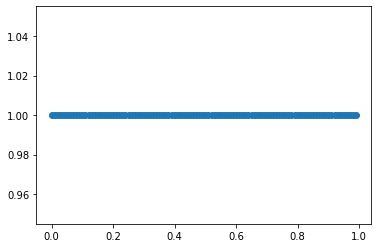

In [ ]:
x = np.arange(0,1, step=0.01)

beta_dist = scipy.stats.beta(a=1, b=1)
plt.scatter(x,beta_dist.pdf(x))
plt.show()

This doesn't encode our belief that the students are doing better than guessing randomly. Choosing the prior with mean two-third using Beta(4,2)



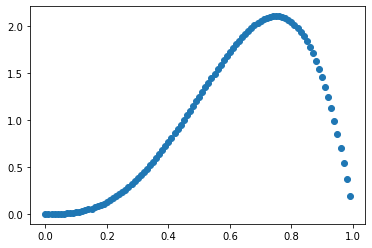

In [ ]:
beta_dist2 = scipy.stats.beta(a=4, b=2)
plt.scatter(x,beta_dist2.pdf(x))
plt.show()

The above distribution has most of the mass above 0.25 but still has some below 0.25.

The effective sample size of a prior $p(\theta|\theta \sim)$ is the number of observations that startig with a vague version of a prior,gives a posterior very close to the $p(\theta | \theta \sim)$

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4229398/#:~:text=with%20this%20issue.-,Prior%20Effective%20Sample%20Size,may%20be%20summarized%20as%20follows.

As we increase the parameter values, it increases the effective samples size and concentrates distribution. Now, we'll try a Beta distribution with parameters 8 & 4 which still maintains a prior mean of two-thirds.


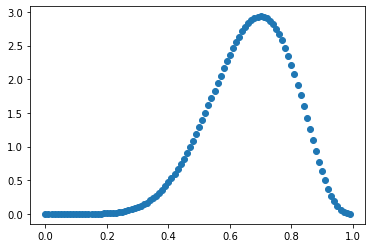

In [ ]:
alpha = 8
beta = 4
beta_dist3 = scipy.stats.beta(a=alpha, b=beta)
plt.scatter(x,beta_dist3.pdf(x))
plt.show()

This distribution has almost all the mass above 0.25 and hence, now seems reasonably suitable as a prior for this problem.

4. Computing prior probabilities that the probability P(theta > 0.25) , P(theta > 0.5) , P(theta > 0.8)

In [ ]:
# P(theta > 0.25 )  = 1 - P(theta <= 0.25).
# We can use the survival function which computes the value 1 - CDF(x)
print("P(theta > 0.25 ) : {}".format(beta_dist3.sf(x=0.25)))
print("P(theta > 0.5 ) : {}".format(beta_dist3.sf(x=0.5)))
print("P(theta > 0.8 ) : {}".format(beta_dist3.sf(x=0.8)))


P(theta > 0.25 ) : 0.9988117218017578
P(theta > 0.5 ) : 0.88671875
P(theta > 0.8 ) : 0.16113919999999993


5. Posterior probability afer a student answering y=33 questions correctly.

The posterior probability is a beta distribution with Beta(a+y, b+n-y)

In [ ]:
def likelihood(n,y,p):
  return comb(N=n, k=y) *(p**y)*((1-p)**(n-y))

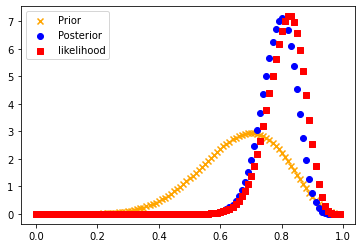

In [ ]:
y1 = 33
n = 40
a = alpha + y1
b = beta + n - y1
likelihood1 = scipy.stats.binom.pmf(k=y1,n=n, p=x)
post_dist1 = scipy.stats.beta(a=a, b=b)
plt.scatter(x,beta_dist3.pdf(x),marker='x', c='orange', label='Prior')
plt.scatter(x, post_dist1.pdf(x), marker='o', c='blue', label='Posterior')
plt.scatter(x, 44*likelihood1, marker='s', c='red',label='likelihood')
plt.legend()
plt.show()

The posterior is more concentrated as we get more information and is more closer to the likelihood since there is more information there with 40 samples whereas the prior has effective samples size of 8+4=12 .

In [ ]:
# Prior mean
beta_dist3.expect(lb=0, ub=1), alpha/(alpha+beta)

(0.6666666666666665, 0.6666666666666666)

In [ ]:
# Maximum likelihood estimate = y/n
y1/n

0.825

In [ ]:
# Posterior mean from random variate x=0 to x=1
post_dist1.expect(lb=0, ub=1),  a/(a+b)

(0.7884615384615398, 0.7884615384615384)

The posterior mean is between prior mean of two-thirds and the Maximum likelihood estimate

In [ ]:
with pm.Model() as model1:
  theta1 = pm.Beta('theta1',alpha=alpha, beta=beta,mu=2/3)
  likelihood1 = pm.Binomial('student1',n=n, p=theta1, observed=33)
  trace1 = pm.sample(1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta1]
100%|██████████| 1500/1500 [00:00<00:00, 2412.57it/s]


In [ ]:
# Posterior mean using pymc
trace1['theta1'].mean()

0.7866125287631928

In [ ]:
# Posterior probability
print("P(theta > 0.25 ) : {}".format(post_dist1.sf(x=0.25)))
print("P(theta > 0.5 ) : {}".format(post_dist1.sf(x=0.5)))
print("P(theta > 0.8 ) : {}".format(post_dist1.sf(x=0.8)))


P(theta > 0.25 ) : 0.9999999999999999
P(theta > 0.5 ) : 0.9999926311420575
P(theta > 0.8 ) : 0.44440438256879644


In [ ]:
# Equal tailed 95%  credible interval
post_dist1.interval(alpha=.95)

(0.6688426487470713, 0.8871094002502565)

In [ ]:
# HPD interval
pm.hpd(trace1,alpha=0.05 )

{0: {'theta1': array([0.67180173, 0.87983646]),
  'theta1_logodds__': array([0.69341552, 1.95255307])},
 1: {'theta1': array([0.6703603 , 0.89720936]),
  'theta1_logodds__': array([0.64345437, 2.04924574])}}

In [ ]:
np.percentile(trace1['theta1'],2.5) , np.percentile(trace1['theta1'], 97.5)

(0.6677771375488525, 0.8857133260735822)

### 6. Second student who answered 24 questions correctly

In [ ]:
y2 = 24

In [ ]:
with pm.Model() as model2:
  theta2 = pm.Beta('theta2',alpha=alpha, beta=beta,mu=2/3)
  likelihood2 = pm.Binomial('student2',n=n, p=theta2, observed=y2)
  trace2 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta2]
100%|██████████| 1500/1500 [00:00<00:00, 2498.64it/s]


Student 2: Posterior distribution with Beta(32,20)


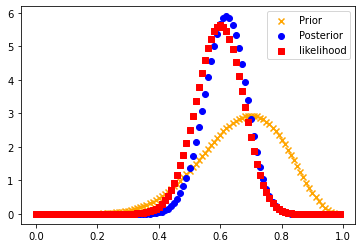

In [ ]:
a2 = alpha + y2
b2 = beta + n - y2
print("Student 2: Posterior distribution with Beta({},{})".format(a2,b2))
likelihood2 = scipy.stats.binom.pmf(k=y2,n=n, p=x)
post_dist2 = scipy.stats.beta(a=a2, b=b2)
plt.scatter(x,beta_dist3.pdf(x),marker='x', c='orange', label='Prior')
plt.scatter(x, post_dist2.pdf(x), marker='o', c='blue', label='Posterior')
plt.scatter(x, 44*likelihood2, marker='s', c='red',label='likelihood')
plt.legend()
plt.show()

In [ ]:
# MLE for student 2
y2/n

0.6

In [ ]:
# Posterior mean
post_dist2.expect(lb=0, ub=1), a2/(a2+b2)

(0.6153846153846143, 0.6153846153846154)

In [ ]:
# Posterior probability for student 2
print("P(theta > 0.25 ) : {}".format(post_dist2.sf(x=0.25)))
print("P(theta > 0.5 ) : {}".format(post_dist2.sf(x=0.5)))
print("P(theta > 0.8 ) : {}".format(post_dist2.sf(x=0.8)))


P(theta > 0.25 ) : 0.9999999863130408
P(theta > 0.5 ) : 0.9540427250920729
P(theta > 0.8 ) : 0.001248189858039872


In [ ]:
# 95% credible interval for 2nd Student
np.percentile(trace2['theta2'],2.5) , np.percentile(trace2['theta2'], 97.5)

(0.47796274152152063, 0.7465590659941858)

Both the lower and upper values in this interval is smaller than the 1st and makes sense to be so since the 2nd student didn't as many questions right as  the 1st one.

7. Though the lower and upper value of interval for the 2nd student is lesser than the 1st one, What is the probability that theta1 > theta2 i.e the 1sst student will answer more questions correctly than the 2nd one?

To figure this out, we will observe the posterior samples after observing the results of each student and compare how often was theta1 > theta2.
The average of comparison will give us an estimate between 0 and 1 which we can interpret as  the probability of theta1 > theta2.

In [ ]:
np.mean(post_dist1.rvs(1000) > post_dist2.rvs(1000))

0.978

In [ ]:
np.mean(trace1['theta1'] > trace2['theta2'])

0.9745

From both the ways of obtaining samples, we see that the probability of theta1 > theta2 is ~ 0.97.